## Purpose of The Research

Covid-19 undeniably is the most trending topic in 2020. The first outbreak started at the end of 2019 from Wuhan Province, which eventually became the global pandemic that affected almost entire country. At the beginning of the Covid-19 pandemic, the virus spreaded quickly, causing a lot of movement restriction in several countries, especially with countries with a massive amount of population which had high mobility habit. Due to that, global economy was whipped down drastically, since essential fields, which required the employee to work in the office, were forced to stay at home in order to cut the virus spread, which leads to almost to zero economy activity. This caused the distruption of commodity supply chain, leading to the short of commodity supply available in the market. To recover from this, there was no instant way other than steady progress to rebuild the economy activity while maintaining the restrictions to prevent the virus spread.

In economic theory, a short of supply should lead to an increase of price. This notebook aim to analyze whether the theory does take place during the pandemic of Covid-19. Since the pandemic started at the end 2019, the data will focus on 2020 data. It will examine the relationship between the price of a commodity and the cumulative Covid-19 case reported. There are two sources of data collected for this analysis, which will be explained later.

## Datasets Introduction
### Commodity price for year 2020

The first dataset collected in this notebook is the `wfpvam_foodprices.csv`. It is a dataset contain the price for several types of commodities. This data was downloaded from [Global Food Prices Database](https://data.humdata.org/dataset/wfp-food-prices), which contains data from 1990-2021. As mentioned earlier, we only focus on 2020 data, as it was the year that heavily represent the price of commodity during the pandemic. Before we filter it, we will try to explore it.

As the original dataset is quite massive, the Github repository only contain the sample of whole csv.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the food price data to the notebook
df1 = pd.read_csv('files/wfpvam_foodprices.csv')

df1.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


In [3]:
# find out the length of original data
print('The length of the data is', len(df1))

The length of the data is 2050638


In [4]:
# find out how many years this data included
df1['mp_year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2002, 2021,
       1996, 1997, 1998, 1999, 1994, 1995, 1992, 1993, 1990, 1991],
      dtype=int64)

Since this data contain years other than 2020, we will drop them, remaining the '2020' data in the Dataframe.

In [5]:
# drop data that is not in Year 2020
df1 = df1.drop(df1.index[df1['mp_year'] != 2020])

df1.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
69,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2020,50.000,NaN
70,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2020,50.000,NaN
71,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2020,50.000,NaN
72,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2020,50.000,NaN
275,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,1,2020,25.375,NaN


In [6]:
# find out the length of data after we dropped other than Year 2020
print('The length of the data after we dropped other than Year 2020 is', len(df1))

The length of the data after we dropped other than Year 2020 is 395781


In [7]:
# check if the Dataframe only contain Year 2020 data
df1['mp_year'].unique()

array([2020], dtype=int64)

Now, we weill check the list of countries and commodities recorded in the table.

In [8]:
# find out countries recorded in this table
df1['adm0_name'].unique()

array(['Afghanistan', 'Angola', 'Argentina', 'Armenia', 'Bangladesh',
       'Bassas da India', 'Belarus', 'Benin', 'Bhutan', 'Bolivia',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
       'Central African Republic', 'Chad', 'China', 'Colombia', 'Congo',
       "Cote d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Ethiopia', 'Gambia', 'Ghana', 'Guatemala', 'Guinea',
       'Guinea-Bissau', 'Haiti', 'Honduras', 'Indonesia',
       'Iran  (Islamic Republic of)', 'Iraq', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       "Lao People's Democratic Republic", 'Lebanon', 'Lesotho',
       'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
       'Mexico', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Russian Federation', 'Rwanda', 'Seneg

In [9]:
# count how many countries recorded in the table
number_countries = df1['adm0_name'].nunique()

print('The number of countries recorded are:', number_countries)

The number of countries recorded are: 87


In [10]:
# find out commodities recorded in this table
df1['cm_name'].unique()

array(['Bread - Retail', 'Wheat - Retail', 'Rice (low quality) - Retail',
       'Wage (qualified labour) - Retail', 'Fuel (diesel) - Retail',
       'Exchange rate - Retail',
       'Wage (non-qualified labour, non-agricultural) - Retail',
       'Oil (cooking) - Retail', 'Sugar - Retail', 'Pulses - Retail',
       'Wheat flour (high quality) - Retail', 'Salt - Retail',
       'Rice (high quality) - Retail',
       'Wheat flour (low quality) - Retail', 'Oil (palm) - Retail',
       'Cassava flour - Retail', 'Maize flour - Retail',
       'Rice (regular, milled) - Retail', 'Milk (powder) - Retail',
       'Oil (soybean) - Retail', 'Sugar (white) - Retail',
       'Wheat - Wholesale', 'Wheat flour - Retail', 'Milk - Retail',
       'Potatoes - Retail', 'Rice (white) - Retail',
       'Meat (beef) - Retail', 'Maize (yellow) - Wholesale',
       'Beans - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Oil (vegetable) - Retail', 'Lentils - Retail', 'Pasta - Retail',
       'To

As can be seen in the above result, the index in __cm_name__ column has a combination of type of commodities and price type, whether it is wholesale or retail price. In order to simplify the sorting process, we will split this column into two new columns seperately.

In [11]:
# split cm_name column into two new columns, using '-' as delimiter
df1['type'], df1['price_type'] = df1['cm_name'].str.split('-', 1).str

df1.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource,type,price_type
69,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2020,50.000,NaN,Bread,Retail
70,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2020,50.000,NaN,Bread,Retail
71,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2020,50.000,NaN,Bread,Retail
72,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2020,50.000,NaN,Bread,Retail
275,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,84,Wheat - Retail,0.0,AFN,15,Retail,5,KG,1,2020,25.375,NaN,Wheat,Retail


To funnel down the scope of the data, we will only include the:

- __adm0_name__ - The country's name
- __um_id__ - The weigth used to calculate the price
- __um_name__ - The unit for the weigth
- __mp_month__ - The month when the price was recorded
- __mp_year__ - The year when the price was recorded
- __mp_price__ - price of the commodity
- __type__ - The commodity type

In [12]:
df1_new = df1[['adm0_name','mp_month', 'mp_year', 'um_id', 'um_name', 'mp_price', 'type']]

df1_new.head()

,adm0_name,mp_month,mp_year,um_id,um_name,mp_price,type
69,Afghanistan,1,2020,5,KG,50.000,Bread
70,Afghanistan,2,2020,5,KG,50.000,Bread
71,Afghanistan,3,2020,5,KG,50.000,Bread
72,Afghanistan,4,2020,5,KG,50.000,Bread
275,Afghanistan,1,2020,5,KG,25.375,Wheat


We rename several columns for the purpose of clarity. The column name will be:

- __country_name__ - The country's name
- __month__ - The month when the price was recorded
- __year__ - The year when the price was recorded
- __weight__ - The weigth used to calculate the price
- __unit__ - The unit for the weigth
- __price__ - price of the commodity
- __type__ - The commodity type

In [13]:
df1_new.rename(columns = {'adm0_name':'country_name', 'mp_month':'month', 'mp_year':'year', 'um_id':'weigth', 'um_name':'unit', 'mp_price':'price'}, inplace = True)

df1_new.head()

,country_name,month,year,weigth,unit,price,type
69,Afghanistan,1,2020,5,KG,50.000,Bread
70,Afghanistan,2,2020,5,KG,50.000,Bread
71,Afghanistan,3,2020,5,KG,50.000,Bread
72,Afghanistan,4,2020,5,KG,50.000,Bread
275,Afghanistan,1,2020,5,KG,25.375,Wheat


As the type of commodities listed are still a lot even after splitting, we will explore only one type of commodity which will represent the dependant variable for this analysis. We will take the most popular staple food in the world, which is rice. Hence we will filter further so it only include the price of rice. 

Since we will include all types of rice, we will split again the 'type' column, so it will split between name of commodities (eg. rice, bread, wheat etc) and its specific types (wholegrain, white etc).

In [14]:
# split 'type' column into two new columns using ' ' delimiter
df1_new['commodity_name'], df1_new['commodity_type'] = df1_new['type'].str.split(' ', 1).str

df1_new.head()

,country_name,month,year,weigth,unit,price,type,commodity_name,commodity_type
69,Afghanistan,1,2020,5,KG,50.000,Bread,Bread,
70,Afghanistan,2,2020,5,KG,50.000,Bread,Bread,
71,Afghanistan,3,2020,5,KG,50.000,Bread,Bread,
72,Afghanistan,4,2020,5,KG,50.000,Bread,Bread,
275,Afghanistan,1,2020,5,KG,25.375,Wheat,Wheat,


In [15]:
# check the name of commodities listed upon splitting
df1_new['commodity_name'].sort_values().unique()

array(['Alcohol', 'Anchovies', 'Apples', 'Avocados', 'Bananas', 'Barley',
       'Batteries', 'Beans', 'Beans(mash)', 'Beetroots', 'Bitter',
       'Bitterball', 'Blackberry', 'Bleach', 'Bottle', 'Bread',
       'Broccoli', 'Buckwheat', 'Bulgur', 'Butter', 'Cabbage',
       'Calamansi', 'Candles', 'Cane', 'Carrots', 'Cashew', 'Cassava',
       'Cauliflower', 'Charcoal', 'Cheese', 'Chicken', 'Chickpeas',
       'Chili', 'Choko', 'Cocoa', 'Coconut', 'Cocoyam', 'Coffee',
       'Cooking', 'Corn', 'Cornstarch', 'Cotton', 'Couscous', 'Cowpeas',
       'Crab', 'Cucumbers', 'Dates', 'Diapers', 'Dishwashing',
       'Disinfecting', 'Eggplants', 'Eggs', 'Electricity', 'Exchange',
       'Feed', 'Firewood', 'Fish', 'Fonio', 'Fuel', 'Gari', 'Garlic',
       'Ghee', 'Ginger', 'Grapes', 'Groundnuts', 'Guava', 'Hand',
       'Handwash', 'Honey', 'Internet', 'Kale', 'Kefir', 'Kocho',
       'Labaneh', 'Laundry', 'Leafy', 'Lemons', 'Lentils', 'Lettuce',
       'Lin', 'Livestock', 'Maize', 'Mandarins',

We successfully create a column that only contain the name of commodity, disregarding its type. Hence, we can now remove all commodity which are not 'Rice'.

In [16]:
# drop name of commodity which is not rice
df1_commodity = df1_new.drop(df1_new.index[df1_new['commodity_name'] != 'Rice'])

df1_commodity.head()

,country_name,month,year,weigth,unit,price,type,commodity_name,commodity_type
431,Afghanistan,1,2020,5,KG,57.0000,Rice (low quality),Rice,(low quality)
432,Afghanistan,2,2020,5,KG,57.0000,Rice (low quality),Rice,(low quality)
433,Afghanistan,3,2020,5,KG,62.5833,Rice (low quality),Rice,(low quality)
434,Afghanistan,4,2020,5,KG,68.0000,Rice (low quality),Rice,(low quality)
1268,Afghanistan,1,2020,5,KG,42.0000,Rice (low quality),Rice,(low quality)


In [17]:
# drop the unused 'type' column
df1_final = df1_commodity.drop('type', axis=1)

df1_final.head()

,country_name,month,year,weigth,unit,price,commodity_name,commodity_type
431,Afghanistan,1,2020,5,KG,57.0000,Rice,(low quality)
432,Afghanistan,2,2020,5,KG,57.0000,Rice,(low quality)
433,Afghanistan,3,2020,5,KG,62.5833,Rice,(low quality)
434,Afghanistan,4,2020,5,KG,68.0000,Rice,(low quality)
1268,Afghanistan,1,2020,5,KG,42.0000,Rice,(low quality)


In [18]:
# check if all data included are rice
df1_final['commodity_name'].unique()

array(['Rice'], dtype=object)

Now we successfully clean our final dataframe 1, which is the price of commodities, to fit our analysis purpose. We will now move on to the second datasets. 

### Cumulative Number of Covid-19 Cases per 2020

The second dataset for this analysis is from `covid19_14des2020.csv`, which was downloaded from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide). This dataset contain the cumulative number of Covid-19 cases reported by each country, which is in terms of per 1,000,000. Unlike before, this dataset recorded daily cases reported by each country, so we need to convert it from daily to monthly average cumulative Covid-19 cases in order to uniform the data quantity. Hence, we will join both tables using country names and months before cleaning it furthermore, especially with outliers and other extreme values that may cause biases in our analysis later on.

In [19]:
df2 = pd.read_csv('files/covid19_14des2020.csv')

df2.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61900 entries, 0 to 61899
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     61900 non-null  object 
 1   day                                                         61900 non-null  int64  
 2   month                                                       61900 non-null  int64  
 3   year                                                        61900 non-null  int64  
 4   cases                                                       61900 non-null  int64  
 5   deaths                                                      61900 non-null  int64  
 6   countriesAndTerritories                                     61900 non-null  object 
 7   geoId                                                       61625 non-null  object 
 

In [21]:
# change dateRep to date format
df2['Date'] = pd.to_datetime(df2.dateRep)

df2.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-11-12
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-10-12


When we convert the __dateRep__ directly to date using `pd.to_datetime`, we saw that it still incorrectly matching the date format that we aim, resulting in both combination od __YYYY-MM-DD__ and __YYYY-DD-MM__. We will re-arrange the date so all date will have uniform __YYYY-MM-DD__ format.

In [22]:
# re-arrange the date format to YYYY-MM-DD
df2['YYYY/MM/DD'] = df2['Date'].dt.strftime('%d/%m/%Y')

df2['YYYY/MM/DD'] = pd.to_datetime(df2['YYYY/MM/DD'])
print(df2.dtypes)

dateRep                                                               object
day                                                                    int64
month                                                                  int64
year                                                                   int64
cases                                                                  int64
deaths                                                                 int64
countriesAndTerritories                                               object
geoId                                                                 object
countryterritoryCode                                                  object
popData2019                                                          float64
continentExp                                                          object
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000           float64
Date                                                          datetime64[ns]

In [23]:
df2.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date,YYYY/MM/DD
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,2020-12-14,2020-12-14
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,2020-12-13,2020-12-13
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,2020-12-12,2020-12-12
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,2020-11-12,2020-12-11
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,2020-10-12,2020-12-10


Now, the date format in __YYYY/MM/DD__ column is already consistent with the __dateRep__ column from original `covid19_14des2020.csv`. We can now check the range of dates available in this dataset.

In [24]:
# check the range of date for the dataset.
df2['YYYY/MM/DD'].sort_values().unique()

array(['2019-12-31T00:00:00.000000000', '2020-01-01T00:00:00.000000000',
       '2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', '2020-01-05T00:00:00.000000000',
       '2020-01-06T00:00:00.000000000', '2020-01-07T00:00:00.000000000',
       '2020-01-08T00:00:00.000000000', '2020-01-09T00:00:00.000000000',
       '2020-01-10T00:00:00.000000000', '2020-01-11T00:00:00.000000000',
       '2020-01-12T00:00:00.000000000', '2020-01-13T00:00:00.000000000',
       '2020-01-14T00:00:00.000000000', '2020-01-15T00:00:00.000000000',
       '2020-01-16T00:00:00.000000000', '2020-01-17T00:00:00.000000000',
       '2020-01-18T00:00:00.000000000', '2020-01-19T00:00:00.000000000',
       '2020-01-20T00:00:00.000000000', '2020-01-21T00:00:00.000000000',
       '2020-01-22T00:00:00.000000000', '2020-01-23T00:00:00.000000000',
       '2020-01-24T00:00:00.000000000', '2020-01-25T00:00:00.000000000',
       '2020-01-26T00:00:00.000000000', '2020-01-27

Unfortunately, the date for December 2020 was not complete, which was recorded only up to 14 December 2020. If we took the average of December 2020, it may not reflect the true information, as the previous `wfpvam_foodprices.csv` had already recorded in form of monthly dataset. Hence, we will use data from January to November 2020 in order to reflect the effect of Covid-19 cases to the commodity price during year 2020. We also take out 2019 data which will not be relevant with our purpose.

In [25]:
# drop the data which were recorded after 30 November 2020
df2_november = df2.drop(df2.index[df2['YYYY/MM/DD'] > '2020-11-30T00:00:00.000000000'])

# drop 2019 data
df2_november = df2_november.drop(df2_november.index[df2_november['YYYY/MM/DD'] == '2019-12-31T00:00:00.000000000'])

df2_november.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date,YYYY/MM/DD
14,30/11/2020,30,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.416633,2020-11-30,2020-11-30
15,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110,2020-11-29,2020-11-29
16,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650,2020-11-28,2020-11-28
17,27/11/2020,27,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.395604,2020-11-27,2020-11-27
18,26/11/2020,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932,2020-11-26,2020-11-26


In [26]:
# check the range of date for the dataset after dropping December 2020 data.
df2_november['YYYY/MM/DD'].sort_values().unique()

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

In [27]:
# check the months included after the date filter from above
df2_month = df2_november.groupby(['year'])['month'].unique()

df2_month

year
2020    [11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Name: month, dtype: object

This already indicates that dataframe already included all complete data from January 2020 - November 2020. We can now proceed further to clean this dataset.

we will only include the columns needed, which are:

- __YYYY/MM/DD__ - The full date format
- __day__ - Day of the date's record
- __month__ - Month of the date's record
- __year__ - Year of the date's record
- __countriesAndTerritories__ - The name of country
- __Cumulative_number_for_14_days_of_COVID-19_cases_per_100000__ - Cumulative Covid-19 reported case for 14 days per 1,000,000 cases 

In [28]:
df2_new = df2_november[['YYYY/MM/DD','day', 'month', 'year', 'countriesAndTerritories', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]

df2_new.head()

,YYYY/MM/DD,day,month,year,countriesAndTerritories,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
14,2020-11-30,30,11,2020,Afghanistan,6.416633
15,2020-11-29,29,11,2020,Afghanistan,6.845110
16,2020-11-28,28,11,2020,Afghanistan,6.784650
17,2020-11-27,27,11,2020,Afghanistan,6.395604
18,2020-11-26,26,11,2020,Afghanistan,7.341932


Now we will convert the data from daily cases to average monthly cases reporting. We also rename the column name to match with column name from the first dataframe.

In [29]:
df2_final = df2_new.groupby(['month', 'countriesAndTerritories'], as_index=False)['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].mean()
df2_final.rename(columns = {'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'AverageMonthlyCovid19CasesPer1000000', 'countriesAndTerritories':'country_name'}, inplace = True)

df2_final

,month,country_name,AverageMonthlyCovid19CasesPer1000000
0,1,Afghanistan,0.000000
1,1,Algeria,0.000000
2,1,Armenia,0.000000
3,1,Australia,0.006265
4,1,Austria,0.000000
...,...,...,...
2002,11,Wallis_and_Futuna,NaN
2003,11,Western_Sahara,0.000000
2004,11,Yemen,0.015088
2005,11,Zambia,3.477216


Now our tables are ready to be merged. We will merge them using inner join method and __country_name__ & __month__ indexes. Hence, we will not include countries that are not listed in the first dataframe.

In [30]:
df_merge = pd.merge(df1_final, df2_final, how='inner', on=['month','country_name'])
pd.options.display.float_format = '{:.6f}'.format

df_merge.head()

,country_name,month,year,weigth,unit,price,commodity_name,commodity_type,AverageMonthlyCovid19CasesPer1000000
0,Afghanistan,1,2020,5,KG,57.000000,Rice,(low quality),0.000000
1,Afghanistan,1,2020,5,KG,42.000000,Rice,(low quality),0.000000
2,Afghanistan,1,2020,5,KG,45.000000,Rice,(low quality),0.000000
3,Afghanistan,1,2020,5,KG,34.000000,Rice,(low quality),0.000000
4,Afghanistan,1,2020,5,KG,53.000000,Rice,(low quality),0.000000


In [31]:
print('The length of final dataframe is:', len(df_merge))

The length of final dataframe is: 25425


In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25425 entries, 0 to 25424
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country_name                          25425 non-null  object 
 1   month                                 25425 non-null  int64  
 2   year                                  25425 non-null  int64  
 3   weigth                                25425 non-null  int64  
 4   unit                                  25425 non-null  object 
 5   price                                 25425 non-null  float64
 6   commodity_name                        25425 non-null  object 
 7   commodity_type                        25425 non-null  object 
 8   AverageMonthlyCovid19CasesPer1000000  24984 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ MB


In [33]:
# check any missing values
df_merge.isnull().sum()

country_name                              0
month                                     0
year                                      0
weigth                                    0
unit                                      0
price                                     0
commodity_name                            0
commodity_type                            0
AverageMonthlyCovid19CasesPer1000000    441
dtype: int64

In [34]:
df_merge.index[df_merge.isnull().any(axis=1)]

Int64Index([  508,  3641,  3642,  3643,  3644,  3645,  3646,  3647,  3648,
             3649,
            ...
            24683, 24684, 24685, 24686, 24687, 24688, 24689, 24690, 24691,
            24692],
           dtype='int64', length=441)

In [35]:
df_merge.iloc[508,:]

country_name                                        Angola
month                                                    3
year                                                  2020
weigth                                                  68
unit                                                 900 G
price                                           903.359900
commodity_name                                        Rice
commodity_type                          (regular, milled) 
AverageMonthlyCovid19CasesPer1000000                   NaN
Name: 508, dtype: object

We will fill the missing value with 0, assuming that the case is 0 because the country did not report any case and recorded to the dataset. 

In [36]:
# filling the missing value with 0
df_merge['AverageMonthlyCovid19CasesPer1000000'] = df_merge['AverageMonthlyCovid19CasesPer1000000'].fillna(0)

df_merge.isnull().sum()

country_name                            0
month                                   0
year                                    0
weigth                                  0
unit                                    0
price                                   0
commodity_name                          0
commodity_type                          0
AverageMonthlyCovid19CasesPer1000000    0
dtype: int64

In [37]:
# checking the unit of weigth
df_merge.groupby(['unit'])['unit'].count()

unit
1.4 KG         317
100 KG         239
120 KG           4
46 KG          104
5 KG            18
50 KG          773
90 KG           26
900 G            9
Cuartilla       18
KG           23791
MT              24
Marmite         84
Pound           18
Name: unit, dtype: int64

To reduce the extreme values, we need to have a uniform unit of weight. The most unit used in this dataset is **KG**, hence for the simplicity we will remove data which does not use KG as the unit of weight.

In [38]:
df_final = df_merge.drop(df_merge.index[df_merge['unit'] != 'KG'])

df_final.head()

,country_name,month,year,weigth,unit,price,commodity_name,commodity_type,AverageMonthlyCovid19CasesPer1000000
0,Afghanistan,1,2020,5,KG,57.000000,Rice,(low quality),0.000000
1,Afghanistan,1,2020,5,KG,42.000000,Rice,(low quality),0.000000
2,Afghanistan,1,2020,5,KG,45.000000,Rice,(low quality),0.000000
3,Afghanistan,1,2020,5,KG,34.000000,Rice,(low quality),0.000000
4,Afghanistan,1,2020,5,KG,53.000000,Rice,(low quality),0.000000


In [39]:
# checking the unit of weigth
df_final['unit'].unique()

array(['KG'], dtype=object)

In [40]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23791 entries, 0 to 25424
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country_name                          23791 non-null  object 
 1   month                                 23791 non-null  int64  
 2   year                                  23791 non-null  int64  
 3   weigth                                23791 non-null  int64  
 4   unit                                  23791 non-null  object 
 5   price                                 23791 non-null  float64
 6   commodity_name                        23791 non-null  object 
 7   commodity_type                        23791 non-null  object 
 8   AverageMonthlyCovid19CasesPer1000000  23791 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.8+ MB


## Research Model

After we explore both datasets, we now can come up with our research model based on the available data. The research model proposed for this analysis will be illustrated using linear equation, as we will use linear regression to predict the model. The model is as below:

> $Y = β1 + β2X2 + ε$

where: 
- $Y$ is the __Price__ denoted by price of rice
- $β1$ is the __constant__ when it intercepts the y axis
- $β2X2$ is the __Average Monthly Covid19 Cases Per 1000000__, with β2 as the slope
- $ε$ is the __error term__ for this model

## Removing outliers

Ww will now check the outliers for the merged table, as it may cause bias to our future result's interpretation. We will explore several features and provide visualizations before removing the outliers.

In [41]:
df_final['price'].describe()

count   23791.000000
mean     4302.648020
std      5415.274672
min         0.610000
25%        54.419250
50%       558.000000
75%     10500.000000
max     28020.000000
Name: price, dtype: float64

In [42]:
month_case = df_final.groupby(['month'])['AverageMonthlyCovid19CasesPer1000000'].mean().reset_index(name= 'AverageCasesPerMonth')

month_case.head()

,month,AverageCasesPerMonth
0,1,0.001060
1,2,0.017652
2,3,0.250304
3,4,1.445129
4,5,3.479492


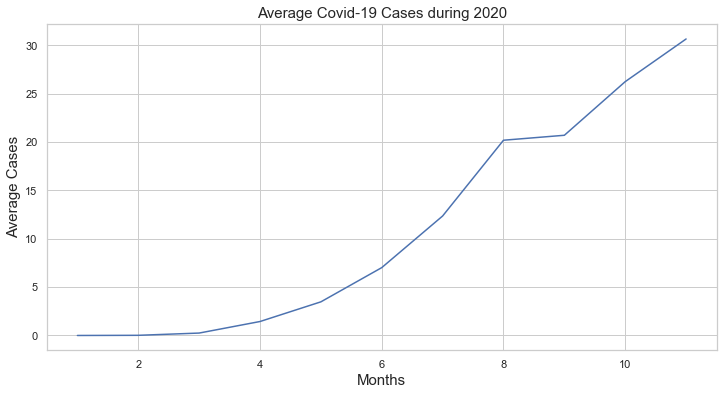

In [43]:
# Check the trend of Covid-19 cases 
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))
plt.xlabel('Months', size=15)
plt.ylabel('Average Cases', size=15)
plt.title("Average Covid-19 Cases during 2020", size=15)
sns.lineplot(x='month',y='AverageCasesPerMonth',data=month_case)
plt.show()

We can found out that there is a significant increase of Covid-19 cases as 2020 goes by, indicating a massive pandemic problem for the whole nations in the world.

<AxesSubplot:title={'center':'Price Boxplot Figure'}, xlabel='price'>

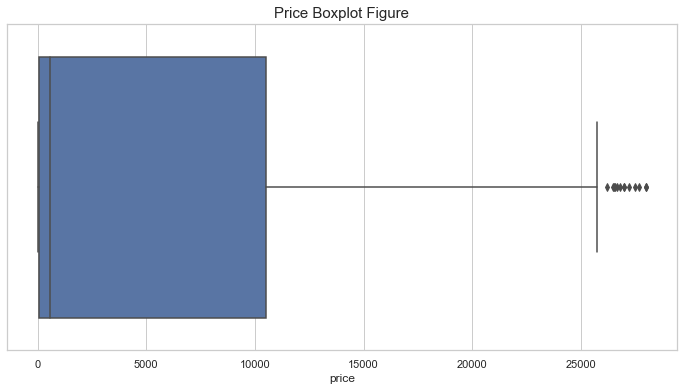

In [44]:
# Check the data treated as outliers in 'price'
plt.figure(figsize=(12,6))
plt.title("Price Boxplot Figure", size=15)
sns.boxplot(x='price', data=df_final)

We will remove the outliers of **price** marked in the boxplot by using statistical technique, by calculating the upper and lower whisker.

> Upper Whisker = 75th Quartile + (1.5 * Interquartile Range)

> Lower Whisker = 25th Quartile - (1.5 * Interquartile Range)

while interquartile range is difference between 75th quartile and 25th quartile.

The numbers outside the whisker is the outliers and will be converted into NaN values and then dropped to remove it. 

In [45]:
# change outliers in 'price' into NaN values
for x in ['price']:
    q75,q25 = np.percentile(df_final.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_final.loc[df_final[x] < min,x] = np.nan
    df_final.loc[df_final[x] > max,x] = np.nan

In [46]:
df_final.isnull().sum()

country_name                             0
month                                    0
year                                     0
weigth                                   0
unit                                     0
price                                   13
commodity_name                           0
commodity_type                           0
AverageMonthlyCovid19CasesPer1000000     0
dtype: int64

In [47]:
# remove NaN values which are the outliers converted from above
df_final=df_final.dropna()

df_final.head()

,country_name,month,year,weigth,unit,price,commodity_name,commodity_type,AverageMonthlyCovid19CasesPer1000000
0,Afghanistan,1,2020,5,KG,57.000000,Rice,(low quality),0.000000
1,Afghanistan,1,2020,5,KG,42.000000,Rice,(low quality),0.000000
2,Afghanistan,1,2020,5,KG,45.000000,Rice,(low quality),0.000000
3,Afghanistan,1,2020,5,KG,34.000000,Rice,(low quality),0.000000
4,Afghanistan,1,2020,5,KG,53.000000,Rice,(low quality),0.000000


In [48]:
# ensure there is no NaN values left
df_final.isnull().any()

country_name                            False
month                                   False
year                                    False
weigth                                  False
unit                                    False
price                                   False
commodity_name                          False
commodity_type                          False
AverageMonthlyCovid19CasesPer1000000    False
dtype: bool

<AxesSubplot:title={'center':'Price Boxplot Figure After Removing Outliers'}, xlabel='price'>

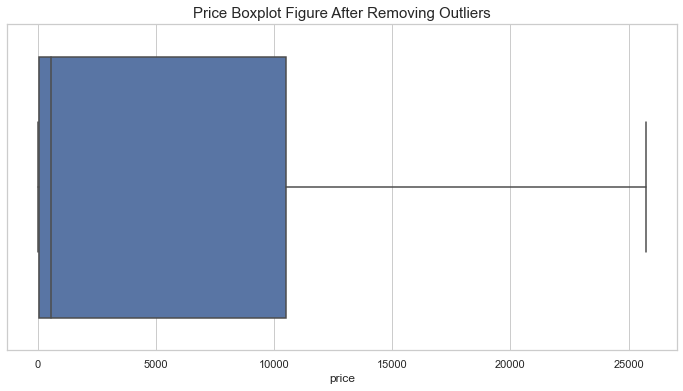

In [49]:
# check if there is any outliers left
plt.figure(figsize=(12,6))
plt.title("Price Boxplot Figure After Removing Outliers", size=15)
sns.boxplot(x='price', data=df_final)

In [50]:
df_final['AverageMonthlyCovid19CasesPer1000000'].describe()

count   23778.000000
mean       12.731701
std        38.233167
min         0.000000
25%         0.288713
50%         2.336856
75%        10.153739
max       824.421087
Name: AverageMonthlyCovid19CasesPer1000000, dtype: float64

In [51]:
covid19_median = np.median(df_final['AverageMonthlyCovid19CasesPer1000000'])
covid19_median

2.3368557164516126

<AxesSubplot:title={'center':'Average Monthly Covid-19 Cases Boxplot Figure'}, xlabel='AverageMonthlyCovid19CasesPer1000000'>

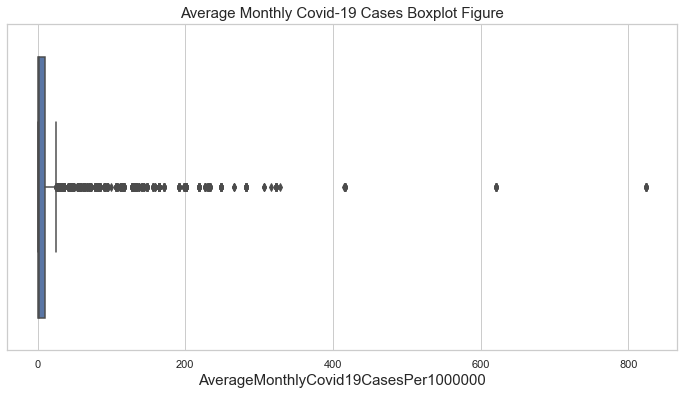

In [52]:
# detecting the outliers for 'AverageMonthlyCovid19CasesPer1000000'
plt.figure(figsize=(12,6))
plt.title('Average Monthly Covid-19 Cases Boxplot Figure', size=15)
plt.xlabel('Average Monthly Covid-19 Cases Per 1000000', size=15)
sns.boxplot(x='AverageMonthlyCovid19CasesPer1000000', data=df_final)

In [53]:
# check the outliers data in Average Monthly Covid-19 Cases
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
Covid19_outliers = detect_outliers_iqr(df_final['AverageMonthlyCovid19CasesPer1000000'])
print("Outliers from IQR method: \n ",Covid19_outliers)

Outliers from IQR method: 
  [25.100313058999998, 25.100313058999998, 25.100313058999998, 25.100313058999998, 25.100313058999998, 25.100313058999998, 25.100313058999998, 25.100313058999998, 25.761285907741936, 25.761285907741936, 25.761285907741936, 26.99073340580645, 26.99073340580645, 26.99073340580645, 26.99073340580645, 26.99073340580645, 26.99073340580645, 26.99073340580645, 26.99073340580645, 27.222369790333335, 27.222369790333335, 27.222369790333335, 27.222369790333335, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47864003451613, 27.47

We detect the outliers using the same statistical methods, by setting the maximum and minimum limit using quartiles and interquartile range. Unlike above, as the number of data of average Covid-19 cases treated as outliers is massive, it will not feasible to remove them like above. Hence, we will use another method in treating outliers. In this case, the outliers will be replaced by median value, as we understand that the mean value affected a lot due to outliers. Hence, it will not be feasible to replace outliers with mean values of **AverageMonthlyCovid19CasesPer1000000**.

In [54]:
# change outliers in 'AverageMonthlyCovid19CasesPer1000000' into NaN values
for x in ['AverageMonthlyCovid19CasesPer1000000']:
    q75,q25 = np.percentile(df_final.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df_final.loc[df_final[x] < min,x] = np.nan
    df_final.loc[df_final[x] > max,x] = np.nan

In [55]:
df_final.isnull().sum()

country_name                               0
month                                      0
year                                       0
weigth                                     0
unit                                       0
price                                      0
commodity_name                             0
commodity_type                             0
AverageMonthlyCovid19CasesPer1000000    2328
dtype: int64

In [56]:
# fill the NaN values with the median
df_final.fillna(covid19_median,inplace=True)

df_final.isnull().any()

country_name                            False
month                                   False
year                                    False
weigth                                  False
unit                                    False
price                                   False
commodity_name                          False
commodity_type                          False
AverageMonthlyCovid19CasesPer1000000    False
dtype: bool

In [57]:
# final descriptive statistics for AverageMonthlyCovid19CasesPer1000000
df_final['AverageMonthlyCovid19CasesPer1000000'].describe()

count   23778.000000
mean        4.621001
std         6.274599
min         0.000000
25%         0.288713
50%         2.336856
75%         5.844028
max        24.315525
Name: AverageMonthlyCovid19CasesPer1000000, dtype: float64

Now we were able to improve the data for **AverageMonthlyCovid19CasesPer1000000**, as the standard deviation has been reduced and the max value did not pass throught the `max` defined above as Q3.

<AxesSubplot:title={'center':'Scatter Plot Between Price and Average Covid-19 Cases'}, xlabel='AverageMonthlyCovid19CasesPer1000000', ylabel='price'>

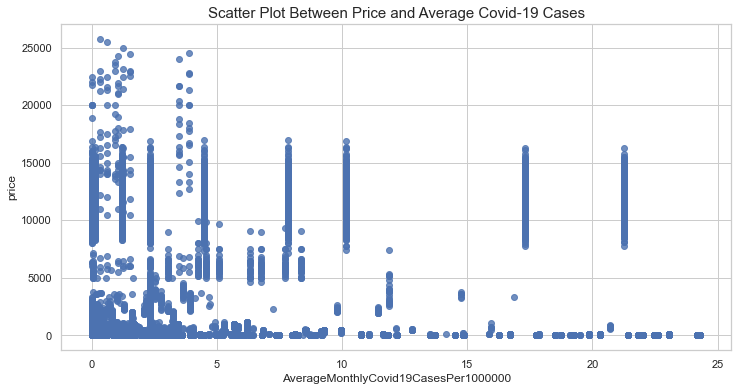

In [58]:
# create scatter plot between Average Monthly Covid-19 Cases and Price
plt.figure(figsize=(12,6))
plt.title('Scatter Plot Between Price and Average Covid-19 Cases', size=15)
sns.regplot(x='AverageMonthlyCovid19CasesPer1000000', y='price', data=df_final, fit_reg=False)

Text(0.5, 1.0, 'Distribution of Price Data')

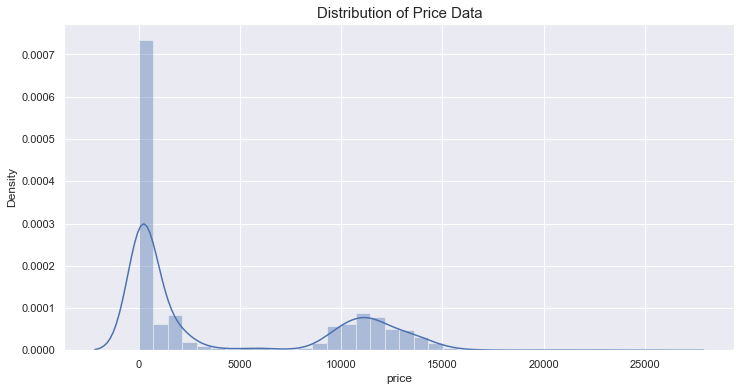

In [59]:
# create distribution histogram from 'price'
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df_final.price)
plt.title('Distribution of Price Data', size=15)

Text(0.5, 1.0, 'Distribution of Average Covid-19 Cases Data')

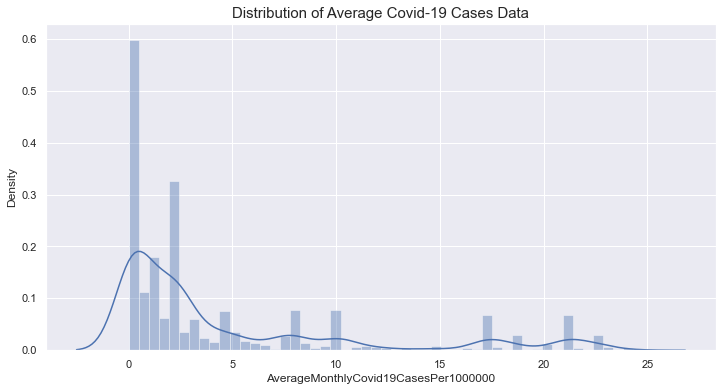

In [60]:
# create distribution histogram from 'AverageMonthlyCovid19CasesPer1000000'
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df_final.AverageMonthlyCovid19CasesPer1000000)
plt.title('Distribution of Average Covid-19 Cases Data', size=15)

In [61]:
# find correlation between 'price' and 'AverageMonthlyCovid19CasesPer1000000'
correlation = df_final['AverageMonthlyCovid19CasesPer1000000'].corr(df_final['price'])

print('Correlation between Price and Covid-19 Case is', correlation)

Correlation between Price and Covid-19 Case is 0.1684485371435354


The correlation result shows that there is an weak positive relationship between price of rice with average monthly case. This does match with the economic theory mentioned at the above, that as cases of Covid-19 increases, it leads to the distrubtion of supply chain due to the slow-down of economic activity, causing the the shortage of commodity supply, which in this case is rice, and leads the increase of price.

However, we can see that both variables are still skewed to the left despite being cleaned from outliers. This should be taken in consideration when interpreting the analysis later, as skewed data may affect heavily the analysis result.

## Splitting Training and Testing Data

We will split the data into training and testing data. The training data will contain 80% of the whole dataframe, which will be used to build the model. The test data will contain 20% of the whole data and will be used to predict using the model made by training data.

Before we split train and testing data, we transform the data using `MinMaxScaler`, so both data will be scalled between 0 and 1. It is also the step to normalize the data to improve model fitting and learning that will be built later using training and testing data.

In [62]:
# create dataframe for columns that will be transformed
df_2var = df_final.loc[:, ['price', 'AverageMonthlyCovid19CasesPer1000000']]
df_2var.head()

,price,AverageMonthlyCovid19CasesPer1000000
0,57.000000,0.000000
1,42.000000,0.000000
2,45.000000,0.000000
3,34.000000,0.000000
4,53.000000,0.000000


In [63]:
from sklearn.preprocessing import MinMaxScaler

# transform both variables with the scale 0-1
scaler = MinMaxScaler()
df_final_scaled = scaler.fit_transform(df_2var)

# rename columns (since now its an np array)
df_final_scaled = pd.DataFrame(df_final_scaled)
df_final_scaled.columns = ['price', 'AverageMonthlyCovid19CasesPer1000000']

df_final_scaled.head(11)

,price,AverageMonthlyCovid19CasesPer1000000
0,0.002190,0.000000
1,0.001607,0.000000
2,0.001724,0.000000
3,0.001297,0.000000
4,0.002035,0.000000
5,0.001187,0.000000
6,0.001258,0.000000
7,0.002734,0.000000
8,0.002190,0.000019
9,0.001607,0.000019


In [64]:
print('Scaled data shape:', df_final_scaled.shape)

Scaled data shape: (23778, 2)


In [65]:
X = df_final_scaled[['AverageMonthlyCovid19CasesPer1000000']]
y = df_final_scaled['price']

print('X data shape:', X.shape)
print('y data shape:', y.shape)

X data shape: (23778, 1)
y data shape: (23778,)


In [66]:
from sklearn.model_selection import train_test_split

# split the data into 80% train data and 20% test data
train, test= train_test_split(df_final_scaled, test_size=0.2, random_state=142)

In [67]:
X_train = train[['AverageMonthlyCovid19CasesPer1000000']]
y_train = train['price']

X_test = test[['AverageMonthlyCovid19CasesPer1000000']]
y_test = test['price']

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (19022, 1)
y_train shape:  (19022,)
X_test shape:  (4756, 1)
y_test shape:  (4756,)


## Train with Simple Linear Regression

After the data has been splitted, now we can build our linear regression model using training data from above.

In [68]:
from sklearn import linear_model

model_reg = linear_model.LinearRegression()
model_reg.fit(X_train, y_train)
predicted_reg = model_reg.predict(X_test)

print("y = ", model_reg.coef_, "* X + ", model_reg.intercept_)

y =  [0.13185003] * X +  0.14188069949538945


The coefficient indicated that an increase of 1% in Covid-19 Cases will result in 13.2% of price, which is the rice in particular, which means it is proven there is a positive relationship between price and average Covid-19 cases. The constant indicated that if Covid-19 cases remain 0, the price of rice will stay at 0.14 per 5 KG. However, the interpretation of the intercept may not be useful, as it does not reflect the price of rice in the real market.

Upon running the linear regression, we will assess the performance of this particular machine learning, using Mean Square Error ($MSE$), $Root MSE$, and $R^2$. The $MSE$ indicates a better performance when the score is low, as iit is the summation of the difference between original value and predicted value on average. On the other hand, $R^2$ shows that a machine learning model works better when the score is higher, as it shows the proportion of variance that can be explained by the model from the total variance.

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

# find the MSE and RMSE score for simple linear regression
mse_reg = mean_squared_error(y_test, predicted_reg)
rmse_reg = np.sqrt(mse_reg)
# find the R2 score for simple linear regression
r2_reg = r2_score(y_test, predicted_reg)

print("MSE:", mse_reg)
print("Root MSE:", rmse_reg)
print("R^2:", r2_reg)

MSE: 0.04237401893633602
Root MSE: 0.2058495055528092
R^2: 0.03475355915347944


We can see here that the model able to have less error with small MSE score recorded. This can happened after we scalled the data. However, the $R^2$ indicates that the model only able to explain 3.5% of the variance in the model. 

Perhaps due to the Covid-19 as an unpredictable factors during 2020, it may affect the overall data quality, hindering to achieve a machine learning model that are sufficient enough to explain it.

## Train with K-Fold Cross Validation

Now we will try to explore the data using K-Fold Cross Validation to find out if the advanced model can provide better result despite the data quality. K-Fold Cross Validation works by creating different 'K' folds of training and testing datasets, then each run will use on different fold for testing data. After the cross validation has exhausted all folds of testing data, we can find the average of accuracy score of using all different folds run before. Hence, it will be able to capture the machine learning result using different folds of testing data.

In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# create K-Fold Cross Validation using 5 folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# scoring the K-Fold model using R2 score
scores_r2 = cross_val_score(model_reg, X, y, scoring='r2', cv=folds)
mean_scores_r2 = scores_r2.mean()
print('R2 score for each round:\n',scores_r2)
print('Average R2 score: %.4f ' % mean_scores_r2)

R2 score for each round:
 [0.02374948 0.0218958  0.0306149  0.03500143 0.02898629]
Average R2 score: 0.0280 


In [71]:
# scoring the K-Fold model using R2 score 
scores_mse = cross_val_score(model_reg, X, y, scoring='neg_mean_squared_error', cv=folds)
mean_scores_mse = -scores_mse.mean()
mean_score_rmse = np.sqrt(mean_scores_mse)
print('MSE scores for each round:\n',scores_mse)
print('Average MSE score: %.4f ' % mean_scores_mse)
print('Average Root MSE Score: %.4f'% mean_score_rmse)

MSE scores for each round:
 [-0.04322485 -0.043692   -0.04240666 -0.04164075 -0.04198254]
Average MSE score: 0.0426 
Average Root MSE Score: 0.2064


## Visualization of Score

After both models has been scored, we will visualize the results for easier comparison of scores between models. We will found out if different model will provide scores with significant or insignificant difference between them.

In [72]:
# create dataframe for MSE scores
mse_df = pd.DataFrame({'MSE': [mse_reg, mean_scores_mse]}, index=['Simple Regression MSE', 'K-Fold Cross Validation MSE'])

mse_df

,MSE
Simple Regression MSE,0.042374
K-Fold Cross Validation MSE,0.042589


In [73]:
# create dataframe for RMSE scores
rmse_df = pd.DataFrame({'RMSE': [rmse_reg, mean_score_rmse]}, index=['Simple Regression RMSE', 'K-Fold Cross Validation RMSE'])

rmse_df

,RMSE
Simple Regression RMSE,0.205850
K-Fold Cross Validation RMSE,0.206372


In [74]:
# create dataframe for R2 scores
r2_df = pd.DataFrame({'R2': [r2_reg, mean_scores_r2]}, index=['Simple Regression R2', 'K-Fold Cross Validation R2'])

r2_df

,R2
Simple Regression R2,0.034754
K-Fold Cross Validation R2,0.028050


<BarContainer object of 2 artists>

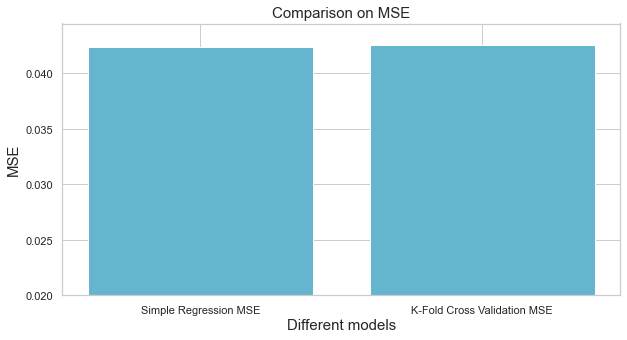

In [75]:
# create visualization to compare MSE scores between machine learning methods
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
plt.ylim(0.02,0.0445)
plt.xlabel('Different models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='MSE', x=['Simple Regression MSE', 'K-Fold Cross Validation MSE'], color='c')

<BarContainer object of 2 artists>

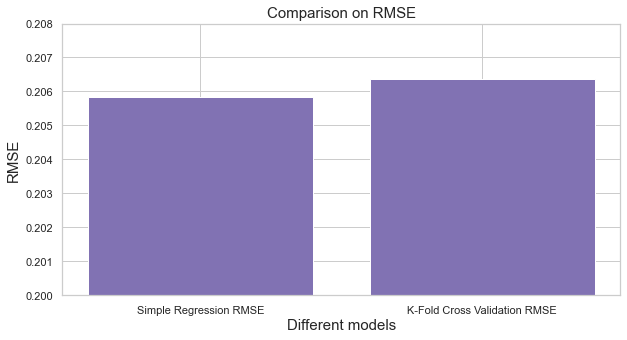

In [76]:
# create visualization to compare RMSE scores between machine learning methods
plt.figure(figsize=(10,5))
plt.ylim(0.2,0.208)
plt.xlabel('Different models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='RMSE', x=['Simple Regression RMSE', 'K-Fold Cross Validation RMSE'], color='m')

<BarContainer object of 2 artists>

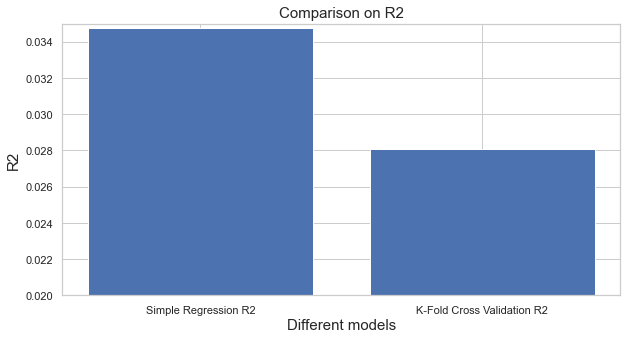

In [77]:
# create visualization to compare R2 scores between machine learning methods
plt.figure(figsize=(10,5))
plt.ylim(0.02,0.035)
plt.xlabel('Different models', size=15)
plt.ylabel('R2', size=15)
plt.title("Comparison on R2", size=15)
plt.bar(data=r2_df, height='R2', x=['Simple Regression R2', 'K-Fold Cross Validation R2'], color='b')

According to illustrations above, we found out that regression using K-Fold Cross Validation seems to provide worse score than simple regression analysis. The mean square error of K-Fold Cross Validation is higher compared to simple regression. The R2 of K-Fold Cross Validation indicates that on average, it is able to explain 2.8% of the variance's model, lower than simple regression that able to explain 3.5% of the variance's model. This is not quite in-line with the theory suggest, where K-Fold Cross Validation should have better score compared with simple linear regression.

Overall, it needs to be acknowledged that the error term in this machine learning model was quite massive, as the contains a lot of variables that were not included in the model. The data distribution was also skewed to left, indicating it was not normally distributed. Perhaps both this caused the model to be insufficient enough for the machine learning purpose.

The author suggests that when there is no time constrain for this machine learning project, the model may include other parameters as the explanatory variables, especially which are related with macroeconomic factors. The research timeframe can be expanded to not only on 2020, but up to 2021 as well. In the beginning, the December 2020 data was dropped since there was no complete one-month data for Average Covid-19 Cases datasets collected. Initially, the author would like to complete it, but due to time constraint, the author dropped it instead. 